In [12]:
import requests
import json

from pathlib import Path
import time

from swissimage_annotator.src.helpers import convert_coordinates

import matplotlib.pyplot as plt
import cv2

In [6]:
BASE_URL = "https://data.geo.admin.ch/api/stac/v0.9/collections/ch.swisstopo.swissimage-dop10/items"
DATA_DIR = Path("predictedData")


def download_tif(x_min=None, x_max=None, y_min=None, y_max=None, data_dir=None, crs=4326):
    if not data_dir:
        data_dir = DATA_DIR

    if crs == 2056:
        coordinates = convert_coordinates([[x_min+100, y_min+100], [x_max-100, y_max-100]], 2056, 4326)
        x_min = coordinates[0][1]
        y_min = coordinates[0][0]
        x_max = coordinates[1][1]
        y_max = coordinates[1][0]

    query = ""
    if x_min and x_max and y_min and y_max:
        query += '?bbox=' + ','.join([str(x_min), str(y_min), str(x_max), str(y_max)])

    url = BASE_URL + query
    print(url)
    response = requests.get(url)
    data = json.loads(response.content.decode('utf-8'))
    for feature in data['features']:
        asset = list(filter(lambda a: a['eo:gsd'] == 0.1, feature['assets'].values()))[0]
        fn = f'{asset["href"].split("/")[-2]}.tif'
        r = requests.get(asset['href'])
        with open(data_dir / fn, 'wb') as f:
            f.write(r.content)

In [7]:
download_tif(2752000, 2753000, 1212000, 1213000, crs=2056)

d:\gitCode\SwimmingPoolDetector\swissimage_annotator\src\helpers.py:18: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  result = list(itransform(source_crs, target_crs, coordinates))


https://data.geo.admin.ch/api/stac/v0.9/collections/ch.swisstopo.swissimage-dop10/items?bbox=9.44025879839222,47.04247542465478,9.45105216476952,47.04948499116623


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [18]:
def retryCall(link, delay=1, trys=10):
    headers = {
        'Content-Type': 'application/json',
        'accept': 'application/json',
    }
    for _ in range(trys):
        try:
            response = requests.get(link, headers=headers)
            return response
        except:
            print("Retry")
            time.sleep(1)

In [19]:

link = "https://data.geo.admin.ch/api/stac/v0.9/collections/ch.swisstopo.swissimage-dop10/items?bbox=9.44025879839222,47.04247542465478,9.45105216476952,47.04948499116623"
response = retryCall(link)

Retry


In [15]:
data = json.loads(response.content.decode('utf-8'))

In [20]:
for feature in data['features']:
        asset = list(filter(lambda a: a['eo:gsd'] == 0.1, feature['assets'].values()))[0]
        fn = f'{asset["href"].split("/")[-2]}.tif'
        r = retryCall(asset['href'])
        with open("aFile", 'wb') as f:
            f.write(r.content)

Retry
Retry
Retry
Retry
Retry
Retry
Retry
Retry
Retry
Retry
Retry
Retry
Retry
Retry
Retry


In [22]:
image = cv2.imread("aFile")

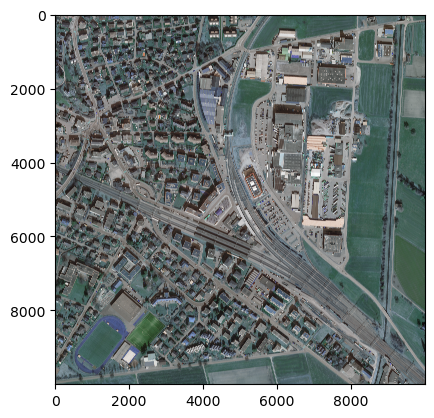

In [24]:
plt.imshow(image)

In [25]:
cuts_per_image = int(1000 / 50)
image_width = image.shape[0]
image_height = image.shape[1]
cropped_width = int(image_width / cuts_per_image)
cropped_height = int(image_height / cuts_per_image)
for i in range(cuts_per_image):
        for j in range(cuts_per_image):
            x = i * cropped_width
            y = j * cropped_height
            new_x = 0 + int(x/10)
            new_y = 0 + int(y/10)
            cv2.imwrite(str(f'predictedData/{new_x}_{new_y}.png'), image[x : x + cropped_width, y : y + cropped_height, :])

In [30]:
image = cv2.imread("predictedData/temp_1")

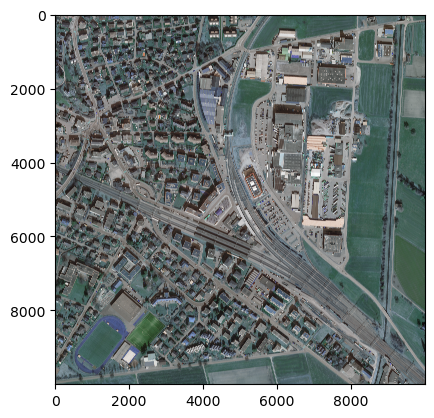

In [31]:
plt.imshow(image)

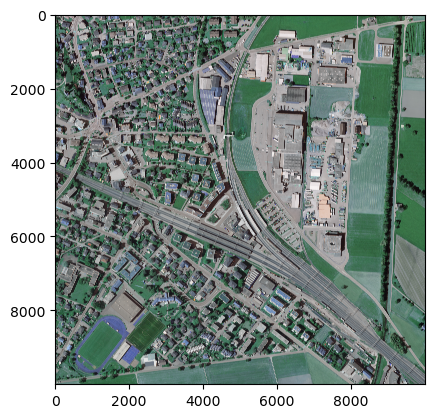

In [32]:
image2 = cv2.imread("predictedData/temp_0")
plt.imshow(image2)

predictedData\temps\stub.txt
predictedData\temps\temp_0
predictedData\temps\temp_1


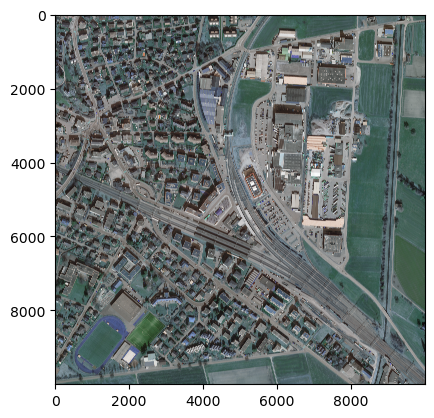

In [55]:
import os
for root, directories, files in os.walk(os.path.join("predictedData", "temps")):
        for filename in files:
            filePath = os.path.join(root, filename)
            print(filePath)
            img = cv2.imread(filePath)

plt.imshow(img)

In [51]:
def cutAndRemoveFile(filepath, filename):
    image = cv2.imread(filepath)
    img = cutImages(image, filename)
    plt.imshow(img)

def cutImages(image, prefix):
    cuts_per_image = int(1000 / 50)
    image_width = image.shape[0]
    image_height = image.shape[1]
    cropped_width = int(image_width / cuts_per_image)
    cropped_height = int(image_height / cuts_per_image)
    for i in range(cuts_per_image):
            for j in range(cuts_per_image):
                x = i * cropped_width
                y = j * cropped_height
                new_x = 0 + int(x/10)
                new_y = 0 + int(y/10)
                croppedImage = image[x : x + cropped_width, y : y + cropped_height, :]
                path = os.path.join("predictedData", f'{prefix}_{new_x}_{new_y}.png')
                ret = cv2.imwrite(path, croppedImage)
                print(ret)
    return croppedImage


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


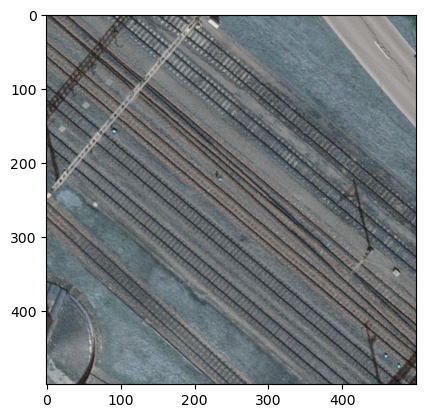

In [53]:
from datetime import datetime
for root, directories, files in os.walk(os.path.join("predictedData", "temps")):
        for filename in files:
            filePath = os.path.join(root, filename)
            timestamp = datetime.now()
            timestamp_str = timestamp.strftime("%Y-%m-%d_%H:%M:%S")
            cutAndRemoveFile(filePath, f"{filename}")

In [56]:
from datetime import datetime

timestamp = datetime.now().timestamp()

In [57]:
timestamp

1715512875.105871